## Домашнее задание 3 (10 баллов)

## НИУ ВШЭ, 2020-21 учебный год

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [1]:
import pandas as pd

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/PersDep/data-mining-intro-2021/main/hw03-EDA-data/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/PersDep/data-mining-intro-2021/main/hw03-EDA-data/german_credit.csv')

In [3]:
df

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad


### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и номинальные.

In [4]:
df.isna().sum()

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

Пропусков нет

In [5]:
# Делим признаки на количественные, бинарные, порядковые и номинальные
countable = ['duration', 'amount', 'age']
binar = ['telephone', 'foreign_worker', 'credit_risk', 'people_liable']
rangeric = ['status', 'savings', 'installment_rate', 'present_residence', 'employment_duration', 'number_credits']
nominal = ['credit_history', 'purpose', 'personal_status_sex', 'other_debtors', 'property', 'other_installment_plans',
           'housing', 'job']

### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [6]:
df.groupby('purpose')['amount'].mean()

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64

### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [7]:
# Процент клиентов моложе 30, снимающих жилье
(df[df['age'] < 30]['housing'] == 'rent').mean() * 100

66.66666666666666

In [8]:
# Процент клиентов старше 40, снимающих жилье
(df[df['age'] > 40]['housing'] == 'rent').mean() * 100

68.01470588235294

### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [9]:
(df[df['foreign_worker'] == 'yes']['number_credits'] == ('4-5' or '>=6')).sum()

1

### Задание 6 (1 балл)

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

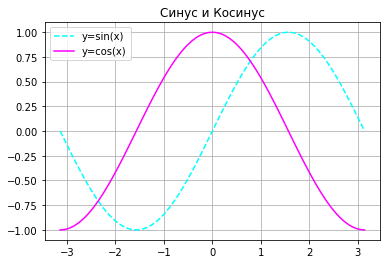

In [11]:
x = np.linspace(-np.pi, np.pi, 100)
plt.plot(x, np.sin(x), label='y=sin(x)', color='aqua', linestyle='--')
plt.plot(x, np.cos(x), label='y=cos(x)', color='fuchsia')
plt.grid()
plt.legend()
plt.title('Синус и Косинус');

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта с помощью зеркальных горизонтальных гистограмм.

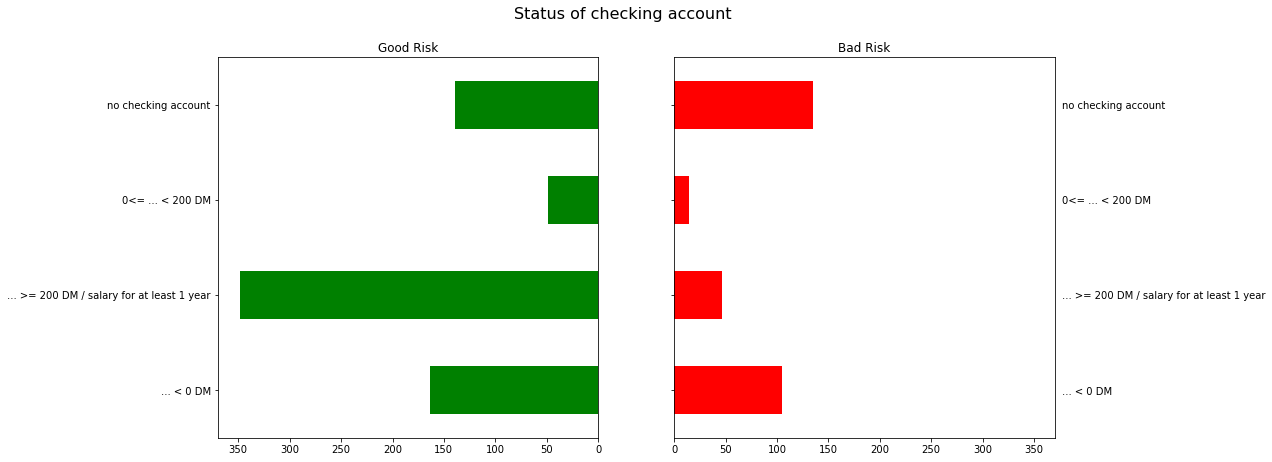

In [12]:
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
df[df['credit_risk'] == 'good']['status'].value_counts().sort_index().plot(kind='barh', color='green')
plt.title('Good Risk')
plt.xlim(370, 0)


plt.subplot(1, 2, 2)
df[df['credit_risk'] == 'bad']['status'].value_counts().sort_index().plot(kind='barh', color='red')
plt.tick_params(axis='y', which='both', labelleft=False, labelright=True)
plt.title('Bad Risk')
plt.xlim(0, 370)

plt.suptitle('Status of checking account', fontsize=16)
plt.show()

Из графика видно, что основное фактор, отличающий заемщиков с "хорошим" и "плохим" уровнем кредитного риска, - размер текущего счета >= 200 DM / salary for at least 1 year	и  < 0 DM.

### Задание 8  (0.5 балла)

In [13]:
import seaborn as sns

Теперь рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn и более классических гистограмм. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

<Figure size 1080x504 with 0 Axes>

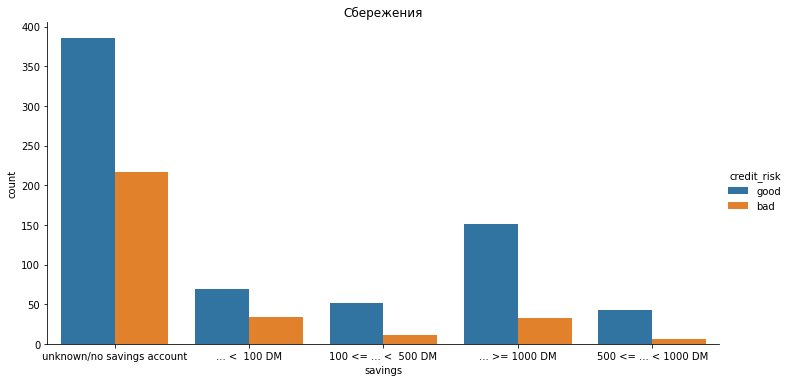

In [14]:
plt.figure(figsize=(15,7))
sns.catplot(x='savings', hue='credit_risk', data = df, kind='count', aspect=2)

plt.title('Сбережения');

Различий в структуре сберегательных счетов между двумя группами кредитного риска из графика не видно. При этом, гораздо больше опрошенных в выборке, у которых либо отсуствует сберегательный счет, либо о нем ничего не известно, среди них многолиц, как из хорошей группы риска, так и из плохой. Заметно больше удачных случаев выплаты занятых денег среди людей со сберегательным счетом >= 1000 DM.

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например.

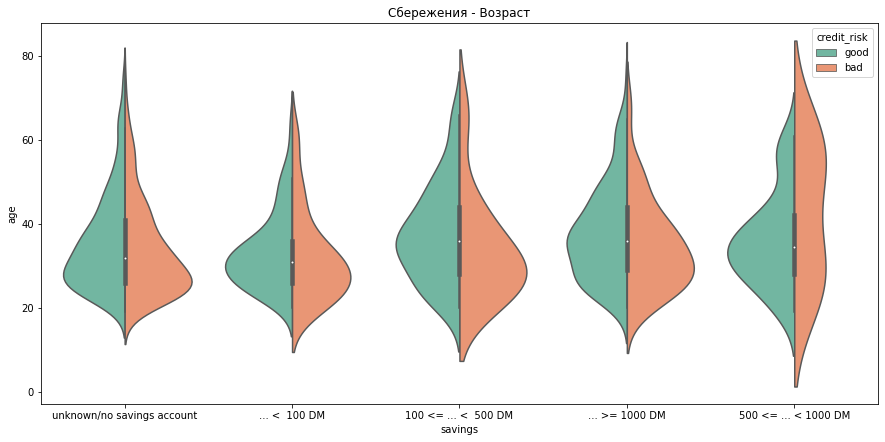

In [15]:
sns.set_palette('Set2')
plt.figure(figsize=(15,7))
sns.violinplot(x='savings', y='age', hue='credit_risk', data=df, split=True)
plt.title('Сбережения - Возраст');

На этом графике видно, что в каждой из категорий больше всего людей 20-40 - лет. В основном концентрация людей из плохих случаев "моложе" в каждой из категорий. Однако среди людей с уровнем сбережений 500 <= ... < 1000 DM и плохим уровнем кредитного риска одинаково как молодых, так и более взрослых представителей.
Интересно также, что почти в каждой категории в районе 55 лет наблюдается сужение, а затем опять некоторое расширение.

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

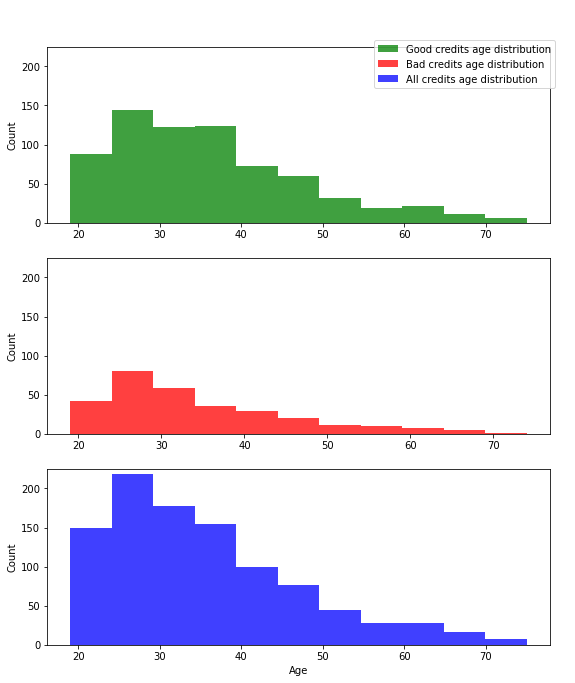

In [16]:
plt.figure(figsize=(9, 11))

plt.subplot(3, 1, 1)
sns.histplot(x=df[df['credit_risk'] == 'good']['age'], bins=11, color='green', linewidth=0)
plt.ylim(0,225)
plt.xlabel('')

plt.subplot(3, 1, 2)
sns.histplot(x=df[df['credit_risk'] == 'bad']['age'], bins=11, color='red', linewidth=0)
plt.ylim(0,225)
plt.xlabel('')

plt.subplot(3, 1, 3)
sns.histplot(x='age', data = df, bins=11, color='blue', linewidth=0)
plt.ylim(0,225)
plt.xlabel('Age')

plt.figlegend(labels=('Good credits age distribution', 'Bad credits age distribution', 'All credits age distribution'),
              loc=(0.65, 0.87));

Здесь видно, во-первых, что выборка людей с плохим уровнем кредитного рсика меньше, чем с хорошим. В каждой из выборок больше всего людей в возрасте 25-30 лет. А так же с увеличенем возраста все меньше и меньше людей берут кредиты. Серьезных различий в возрастной структуре среди людей с разным уровнем кредитного рсика не обнаружено.

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

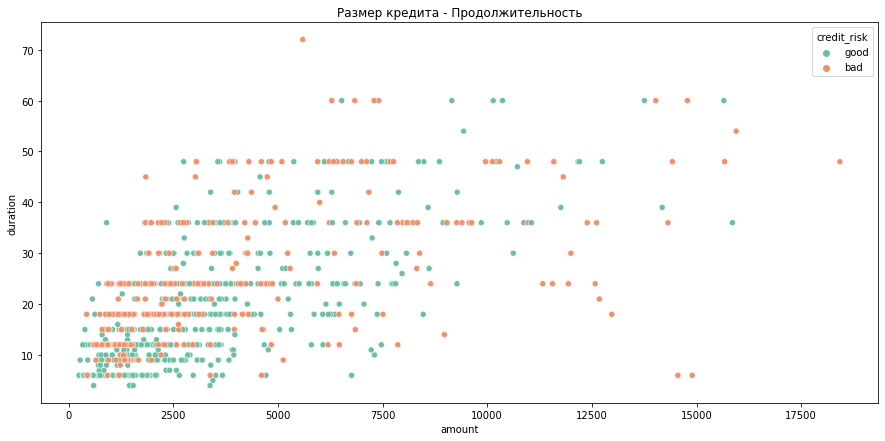

In [17]:
plt.figure(figsize=(15,7))
sns.scatterplot(x='amount', y='duration', hue='credit_risk', data=df)
plt.title('Размер кредита - Продолжительность');

Основная часть выборки расположена в нижней левой части графика: малая сумма на малый срок, там примерно одинаково как хороших, так и плохих примеров. интересно, что в правой нижней части графика - большая сумма на малый срок - сконцентрированы только плохие кредитные случаи.

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

In [18]:
from mpl_toolkits.mplot3d import Axes3D

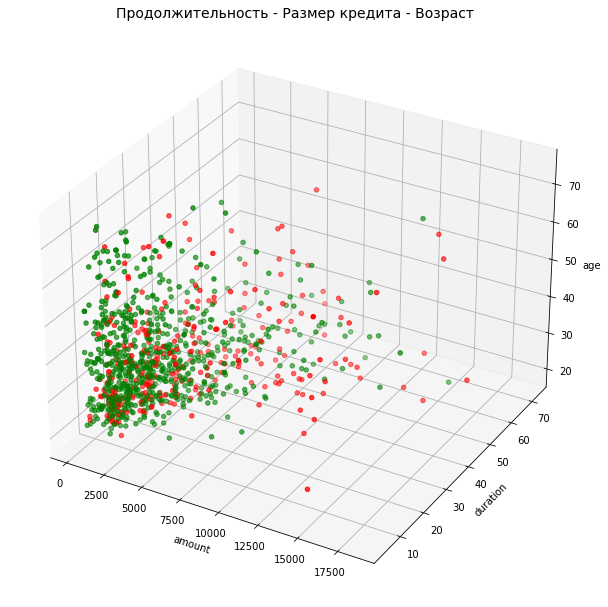

In [19]:
fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig)
colors = {'good': 'green', 'bad': 'red'}

ax.scatter(df['amount'], df['duration'], df['age'], c=df['credit_risk'].apply(lambda x: colors[x]))
ax.set_title('Продолжительность - Размер кредита - Возраст', size=14)
ax.set_xlabel('amount')
ax.set_ylabel('duration')
ax.set_zlabel('age');

Основная часть выборки сконцентрирована в зоне "Малая сумма - Малый срок - Возраст 20-30". Плохие случаи, как было замечено выше, в основном расположены среди больших сумм, малых сроков. Сложно понять, среди каких возрастов их больше, но, кажется, их несколько больше в части молодых представителей выборки.

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений (0, .., n). Избавьтесь от номинальных признаков.

In [20]:
# Еще раз напомню, как я разделила переменные
countable = ['duration', 'amount', 'age']
binar = ['telephone', 'foreign_worker', 'credit_risk', 'people_liable']
rangeric = ['status', 'savings', 'installment_rate', 'present_residence', 'employment_duration', 'number_credits']
nominal = ['credit_history', 'purpose', 'personal_status_sex', 'other_debtors', 'property', 'other_installment_plans',
           'housing', 'job']

In [21]:
# Кодируем порядковые переменные
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

for i in range(len(rangeric)):
    df = df.join(pd.DataFrame(label.fit_transform(df[rangeric[i]]), columns=[f'{rangeric[i]}Code']), how='right')
    
df = df.drop(rangeric, axis=1, inplace=False)

In [22]:
# Переводим бинарные переменные в (0, 1)
df = df.join(pd.get_dummies(df[binar], drop_first=True), how='right')
df = df.drop(binar, axis=1, inplace=False)

In [23]:
# Удаляем номинальные переменные
df = df.drop(nominal, axis=1, inplace=False)

### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте предложить какую-нибудь формулу для вычисления по предоставленному набору признаков целевой переменной, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. 
Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать целевую переменную, положительный или отрицательный прогноз по кредиту (0 или 1).
Для подготовки и проверки формулы нужно будет соответственно разделить данные на 2 набора признаков и соответствующие им векторы целевых переменных. Удобно воспользоваться для этого подходящей функцией из sklearn.

In [24]:
# Нормализуем количественные переменные
from sklearn.preprocessing import normalize
df = df.join(pd.DataFrame(normalize(df[['duration', 'amount', 'age']]), 
                          columns = ['duration_norm', 'amount_norm', 'age_norm']), how='right')

In [25]:
df.columns

Index(['duration', 'amount', 'age', 'statusCode', 'savingsCode',
       'installment_rateCode', 'present_residenceCode',
       'employment_durationCode', 'number_creditsCode',
       'telephone_yes (under customer name)', 'foreign_worker_yes',
       'credit_risk_good', 'people_liable_3 or more', 'duration_norm',
       'amount_norm', 'age_norm'],
      dtype='object')

In [26]:
# Делим выборку на тренировочную и тестовую и выбираем переменные, по которым будем предсказывать
from sklearn.model_selection import train_test_split
x = df[['statusCode', 'number_creditsCode', 'amount_norm', 'duration_norm', 'people_liable_3 or more', 'age_norm']]
y = df['credit_risk_good']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=123)

In [27]:
# Определяем очень умную формулу для предсказания)
def pred(a):
    if a > 0.5:
        return 1
    return 0

for i in (X_train, X_test):
    i['am/dur'] = i['amount_norm']/i['duration_norm']
    i['risk'] = 1 - 0.2 * i['statusCode']/i['statusCode'].max() - 0.2 * i['number_creditsCode']/i['number_creditsCode'].max()\
    - 1.5 * i['am/dur']/ i['am/dur'].max() + 0.2 * i['people_liable_3 or more'] + 0.4 * i['age_norm'] ** 2
    i['risk_pred'] = i['risk'].apply(pred)


<ipython-input-27-fc3ecd4f676c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i['am/dur'] = i['amount_norm']/i['duration_norm']
<ipython-input-27-fc3ecd4f676c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i['risk'] = 1 - 0.2 * i['statusCode']/i['statusCode'].max() - 0.2 * i['number_creditsCode']/i['number_creditsCode'].max()\
<ipython-input-27-fc3ecd4f676c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

In [28]:
# Покажем, что это не константная модель
X_train['risk_pred'].value_counts()

1    788
0     12
Name: risk_pred, dtype: int64

In [29]:
X_test['risk_pred'].value_counts()

1    182
0     18
Name: risk_pred, dtype: int64

In [30]:
# Посчитаем функционал ошибки для тренировочной и тестовой выборки
error = list()
for i in ([X_train, y_train], [X_test, y_test]):
    i[0]['error'] = abs(i[0]['risk_pred'] - i[1])
    error.append(i[0]['error'].mean())

print(f'Доля ошибок в тренировочной выборке: {error[0]}')
print(f'Доля ошибок в тестовой выборке: {error[1]}')

Доля ошибок в тренировочной выборке: 0.295
Доля ошибок в тестовой выборке: 0.32


<ipython-input-30-5001da870246>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i[0]['error'] = abs(i[0]['risk_pred'] - i[1])
